# Exploratory Data Analysis(EDA) of Online Sales Dataset

## Loading the dataset from the data source

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the datasets
orders_df = pd.read_csv(r"D:\datasets\Orders.csv")
details_df = pd.read_csv(r"D:\datasets\Details.csv")

In [4]:
# Merging the two datasets on 'Order ID'
merged_df = pd.merge(orders_df, details_df, on='Order ID')
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD


## Data cleaning and pre-processing

#### Checking for null values

In [5]:
# To check if there is any null value in the loaded dataset
null_count = merged_df.isnull().sum()

if null_count.any() > 0:
    print("There are ", null_count.sum(), " missing values in the dataframe. Take necessary actions!")
elif null_count.all() == 0:
    print("No null value in the dataframe")

merged_df.isnull().sum()

No null value in the dataframe


Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

#### Checking for duplicate records

In [6]:
# Check for duplicates
duplicates = merged_df.duplicated()
print("Number of duplicates present:", duplicates.sum())

Number of duplicates present: 0


#### Summary of the processed dataset

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Order Date    1500 non-null   object
 2   CustomerName  1500 non-null   object
 3   State         1500 non-null   object
 4   City          1500 non-null   object
 5   Amount        1500 non-null   int64 
 6   Profit        1500 non-null   int64 
 7   Quantity      1500 non-null   int64 
 8   Category      1500 non-null   object
 9   Sub-Category  1500 non-null   object
 10  PaymentMode   1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB


**NOTE: Out of 11 columns we have 3 numeric columns: Amount, Profit and Quantity**

In [8]:
# Summary statistics for numerical columns
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,1500.0,291.847333,461.924620,4.0,47.75,122.0,326.25,5729.0
Profit,1500.0,24.642000,168.558810,-1981.0,-12.00,8.0,38.00,1864.0
Quantity,1500.0,3.743333,2.184942,1.0,2.00,3.0,5.00,14.0


#### Checking for outliers

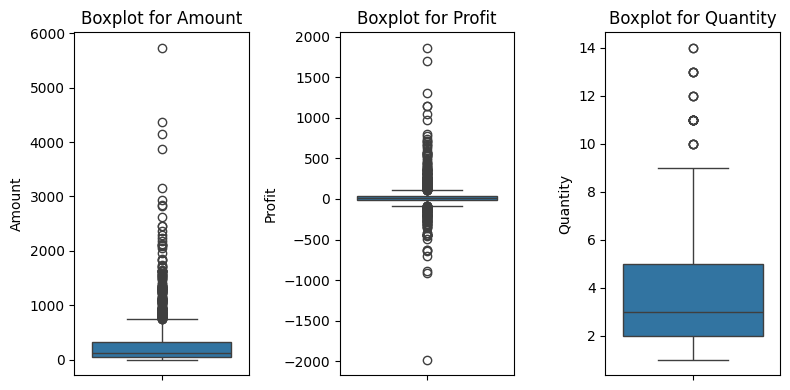

In [10]:
num_columns = 3 
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed
num_rows = (len(merged_df[numerical_cols].columns) + num_columns - 1) // num_columns


fig, axes = plt.subplots(num_rows, num_columns, figsize=(8,4))
axes = axes.flatten()

# Plot each boxplot in a separate subplot
for i, column in enumerate(merged_df[numerical_cols].columns):
    sns.boxplot(data=merged_df[column], ax=axes[i], orient="v")
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [11]:
merged_df[numerical_cols].head()

,Amount,Profit,Quantity
0,5729,64,14
1,671,114,9
2,443,11,1
3,57,7,2
4,227,48,5


In [12]:
#Defining outliers detecting function----
def outlier_detection(data_column):
    sorted(data_column)
    Q1,Q3 = np.percentile(data_column,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [13]:
data_df= merged_df.copy()

for col in data_df.columns:
    if data_df[col].dtype in ['float64', 'int64']:
        l, u = outlier_detection(data_df[col])
        col_outliers = data_df[(data_df[col] <= l) | (data_df[col] >= u)][col]
        perc = col_outliers.shape[0] * 100.0 / data_df.shape[0]
        #print("Column %s outliers = %.2f%%" % (col, perc))
        print(f"Column {col} outliers = {perc:.2f}% with lower and upper range as {l} & {u}")


Column Amount outliers = 10.20% with lower and upper range as -370.0 & 744.0
Column Profit outliers = 18.67% with lower and upper range as -87.0 & 113.0
Column Quantity outliers = 1.53% with lower and upper range as -2.5 & 9.5


**- So it's observed that, each numeric column has some outliers, but not in a very large proportion. Hence, for the time-being we are not removing the outliers or replacing with mean/median value in order to preserve the original data.**

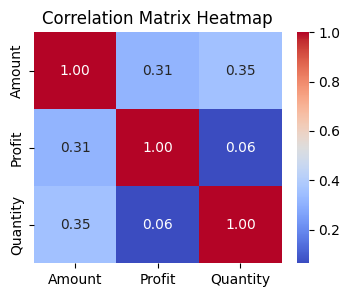

In [14]:
# Plotting a correlation matrix heatmap
correlation_matrix = merged_df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(4,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
# Saving the processed dataset to internal storage
merged_df.to_csv("D:\datasets\Sales_data.csv")

## Exploratory visualizations and analysis in order to extract useful business insights

- Plotting relevant charts and graphs based on business questions
- using data visualisation tools- matplotlib and seaborn

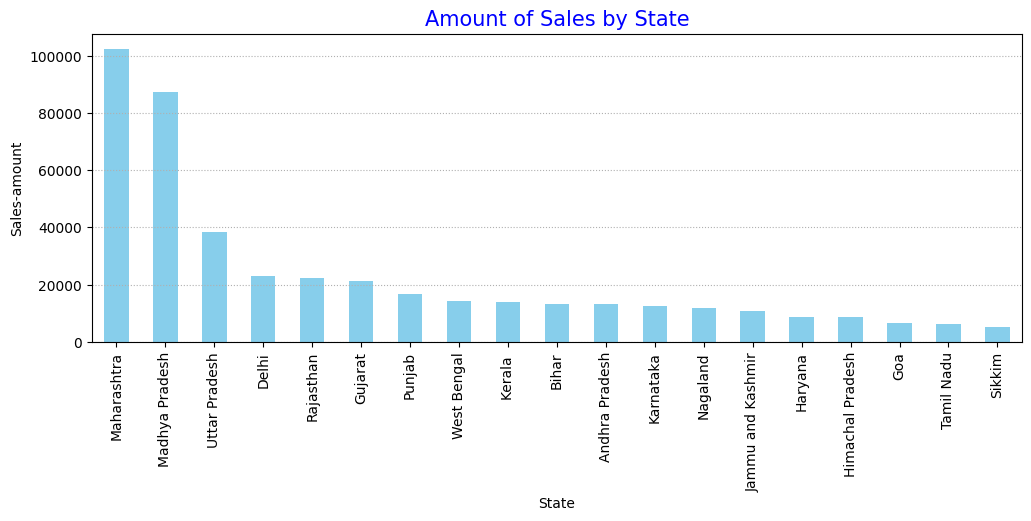

In [16]:
# plotting a bar chart of sales by state
plt.figure(figsize=(12, 4))
state_sales = merged_df.groupby('State')['Amount'].sum().sort_values(ascending=False)
state_sales.plot(kind='bar', color='skyblue')
plt.title("Amount of Sales by State",fontsize=15,c='b')
plt.xlabel("State")
plt.ylabel("Sales-amount")
plt.grid(True,axis='y',ls=':')
plt.show()


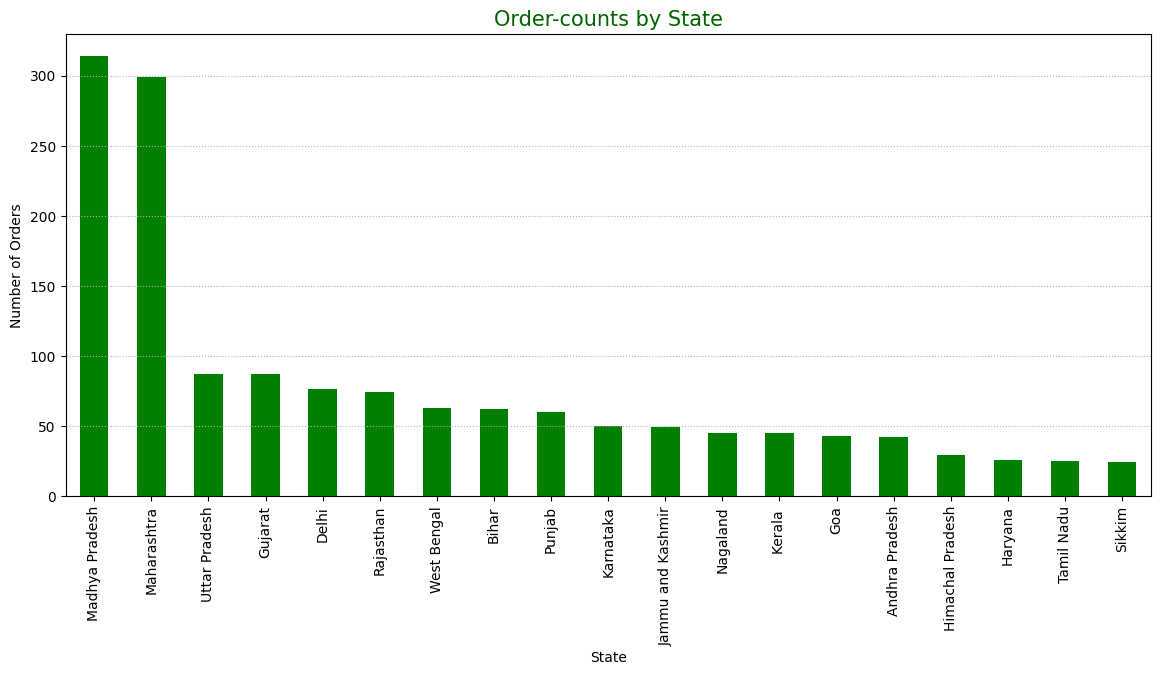

In [17]:
# For example, plotting a bar chart of sales by state
plt.figure(figsize=(14, 6))
state_sales_count = merged_df.groupby('State')['Order ID'].count().sort_values(ascending=False)
state_sales_count.plot(kind='bar', color='green')
plt.title("Order-counts by State",fontsize=15,c='darkgreen')
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.grid(True,axis='y',ls=':')
plt.show()


In [18]:
merged_df.head(2)

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card


In [19]:
category_sales = merged_df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
subcategory_sales = merged_df.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False)


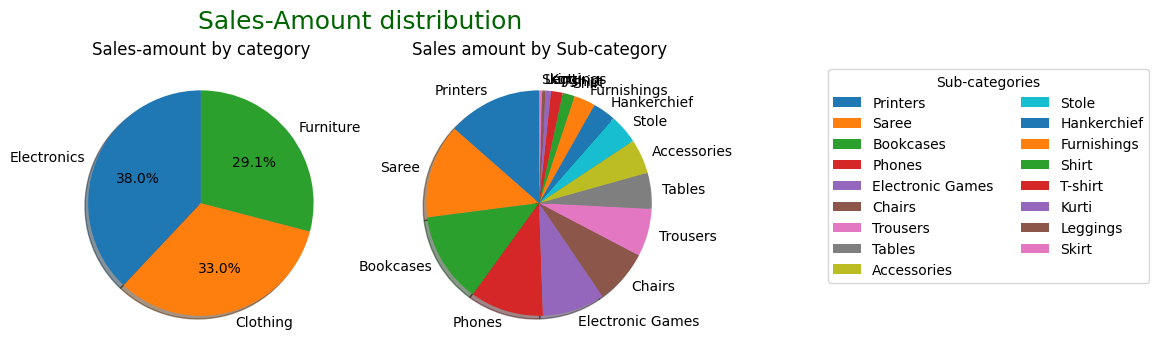

In [26]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8, 4))
fig.suptitle('Sales-Amount distribution',fontsize=18,color='darkgreen')

# Pieplot - Sales amount by Category
axes[0].pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90,shadow=True)
axes[0].set_title("Sales-amount by category")

# Pieplot- Sub-category distribution
axes[1].pie(subcategory_sales, labels=subcategory_sales.index, startangle=90, shadow=True)
axes[1].set_title("Sales amount by Sub-category")
plt.legend(bbox_to_anchor=(1.5, 1.0), ncols=2,title="Sub-categories")

plt.show()

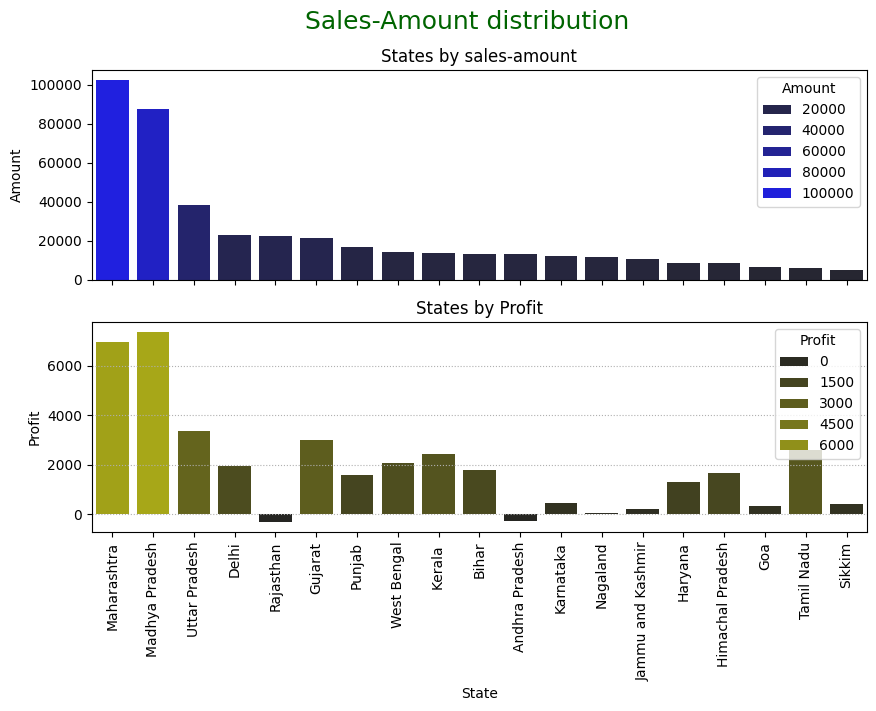

In [27]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
fig.suptitle('Sales-Amount distribution', fontsize=18, color='darkgreen')

state_sales_df = pd.DataFrame(merged_df.groupby('State')['Amount'].sum().sort_values(ascending=False))
sns.barplot(ax=axes[0], data=state_sales_df, x=state_sales_df.index, y='Amount', color='b', hue='Amount')
axes[0].set_title("States by sales-amount")
plt.grid(True,axis='y',ls=':')

state_profit_df = pd.DataFrame(merged_df.groupby('State')['Profit'].sum().sort_values(ascending=False))
sns.barplot(ax=axes[1], data=state_profit_df, x=state_profit_df.index, y='Profit', color='y', hue='Profit')
plt.xticks(rotation=90)
axes[1].set_title("States by Profit")
plt.grid(True,axis='y',ls=':')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


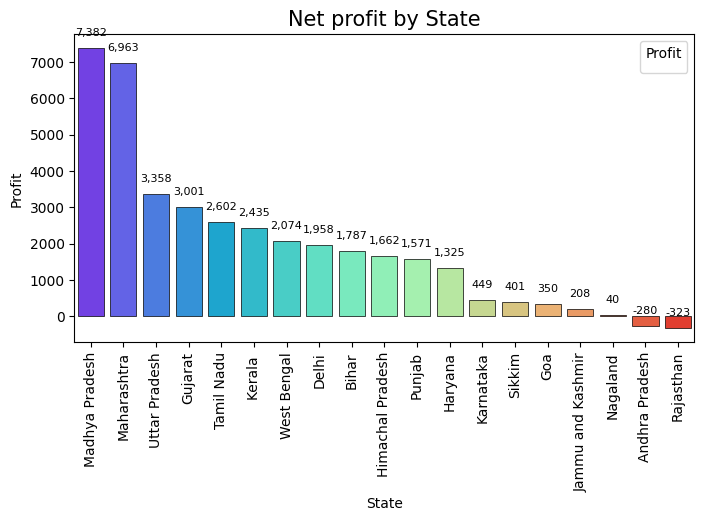

In [22]:
plt.figure(figsize=(8,4))
state_profit_df = pd.DataFrame(merged_df.groupby('State')['Profit'].sum().sort_values(ascending=False))
ax = sns.barplot(data=state_profit_df, x=state_profit_df.index, y='Profit', palette='rainbow', edgecolor='black', linewidth=0.5)

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 11), textcoords='offset points', fontsize=8)

plt.title("Net profit by State",fontsize=15,c='k')
plt.legend(title='Profit', loc='upper right')
plt.xticks(rotation=90)
plt.show()